In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data exploration
* Visualization and examination of statistical measures

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Data exploration is conducted solely on `train.csv` to avoid data leakage. 

In [3]:
train_df = pd.read_csv('../datasets/train.csv')

X = train_df.drop(["y", "shares"], axis=1)
y = train_df["y"]
train_df

id  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      17335             9.0             409.0         0.501326   
1      21242            10.0             317.0         0.725086   
2       9448            11.0             447.0         0.584091   
3      36797            13.0             143.0         0.638298   
4      29504            17.0             576.0         0.524412   
...      ...             ...               ...              ...   
22195   8739            10.0               NaN         0.490196   
22196  35936            12.0            2549.0         0.325581   
22197  33258            10.0             223.0         0.645740   
22198  28306            10.0             592.0         0.434635   
22199  35842             NaN             354.0         0.528902   

       n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0                   1.0                  0.587361       23.0             2.0   
1                   1.0                  0.830097        6.0             3.0   
2                   1.0                  0.730104        NaN             1.0   
3                   NaN                  0.787500        3.0             2.0   
4                   1.0                  0.714286        8.0             3.0   
...                 ...                       ...        ...             ...   
22195               1.0                  0.655629        NaN             1.0   
22196               1.0                  0.495929       77.0            20.0   
22197               1.0                  0.789855        4.0             2.0   
22198               1.0                  0.600000        NaN             7.0   
22199               NaN                  0.663551        NaN             3.0   

       num_imgs  num_videos  ...  min_negative_polarity  \
0          11.0         0.0  ...              -0.187500   
1           NaN        21.0  ...              -0.600000   
2           1.0         1.0  ...              -0.500000   
3           NaN         0.0  ...               0.000000   
4           NaN         0.0  ...              -1.000000   
...         ...         ...  ...                    ...   
22195       1.0         NaN  ...              -0.700000   
22196       NaN         0.0  ...              -0.800000   
22197       1.0         0.0  ...              -0.300000   
22198       1.0         1.0  ...              -0.166667   
22199       1.0         0.0  ...              -0.500000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                     -0.100                0.50                     0.500   
1                        NaN                0.00                     0.000   
2                     -0.100                0.75                     0.125   
3                      0.000                1.00                       NaN   
4                     -0.100                0.00                     0.000   
...                      ...                 ...                       ...   
22195                 -0.100                 NaN                     0.000   
22196                 -0.050                0.00                     0.000   
22197                 -0.050                0.00                     0.000   
22198                 -0.025                0.50                     0.000   
22199                 -0.100                0.10                       NaN   

       abs_title_subjectivity  abs_title_sentiment_polarity   data_channel  \
0                        0.00                         0.500      Lifestyle   
1                        0.50                         0.000      Lifestyle   
2                        0.25                         0.125          World   
3                        0.50                         0.500   Social Media   
4                        0.50                         0.000          World   
...                       ...                           ...            ...   
22195                    0.50                       

## Overview

In [4]:
train_df.head()

id  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0  17335             9.0             409.0         0.501326               1.0   
1  21242            10.0             317.0         0.725086               1.0   
2   9448            11.0             447.0         0.584091               1.0   
3  36797            13.0             143.0         0.638298               NaN   
4  29504            17.0             576.0         0.524412               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.587361       23.0             2.0      11.0         0.0   
1                  0.830097        6.0             3.0       NaN        21.0   
2                  0.730104        NaN             1.0       1.0         1.0   
3                  0.787500        3.0             2.0       NaN         0.0   
4                  0.714286        8.0             3.0       NaN         0.0   

   ...  min_negative_polarity  max_negative_polarity  title_subjectivity  \
0  ...                -0.1875                   -0.1                0.50   
1  ...                -0.6000                    NaN                0.00   
2  ...                -0.5000                   -0.1                0.75   
3  ...                 0.0000                    0.0                1.00   
4  ...                -1.0000                   -0.1                0.00   

   title_sentiment_polarity  abs_title_subjectivity  \
0                     0.500                    0.00   
1                     0.000                    0.50   
2                     0.125                    0.25   
3                       NaN                    0.50   
4                     0.000                    0.50   

   abs_title_sentiment_polarity  data_channel    weekday  shares  y  
0                         0.500     Lifestyle        NaN     801  0  
1                         0.000     Lifestyle    Tuesday     426  0  
2                         0.125         World     Friday    2400  1  
3                         0.500  Social Media        NaN    1100  0  
4                         0.000         World  Wednesday    1500  1  

[5 rows x 49 columns]

In [5]:
train_df.tail()

id  n_tokens_title  n_tokens_content  n_unique_tokens  \
22195   8739            10.0               NaN         0.490196   
22196  35936            12.0            2549.0         0.325581   
22197  33258            10.0             223.0         0.645740   
22198  28306            10.0             592.0         0.434635   
22199  35842             NaN             354.0         0.528902   

       n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
22195               1.0                  0.655629        NaN             1.0   
22196               1.0                  0.495929       77.0            20.0   
22197               1.0                  0.789855        4.0             2.0   
22198               1.0                  0.600000        NaN             7.0   
22199               NaN                  0.663551        NaN             3.0   

       num_imgs  num_videos  ...  min_negative_polarity  \
22195       1.0         NaN  ...              -0.700000   
22196       NaN         0.0  ...              -0.800000   
22197       1.0         0.0  ...              -0.300000   
22198       1.0         1.0  ...              -0.166667   
22199       1.0         0.0  ...              -0.500000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
22195                 -0.100                 NaN                       0.0   
22196                 -0.050                 0.0                       0.0   
22197                 -0.050                 0.0                       0.0   
22198                 -0.025                 0.5                       0.0   
22199                 -0.100                 0.1                       NaN   

       abs_title_subjectivity  abs_title_sentiment_polarity   data_channel  \
22195                     0.5                           0.0  Entertainment   
22196                     0.5                           0.0   Social Media   
22197                     0.5                           0.0       Business   
22198                     0.0                           0.0       Business   
22199                     0.4                           0.1          World   

         weekday  shares  y  
22195   Saturday    2600  1  
22196        NaN    2900  1  
22197  Wednesday     772  0  
22198   Thursday     941  0  
22199  Wednesday     740  0  

[5 rows x 49 columns]

In [6]:
train_df.shape

(22200, 49)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22200 entries, 0 to 22199
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22200 non-null  int64  
 1   n_tokens_title                20000 non-null  float64
 2   n_tokens_content              20054 non-null  float64
 3   n_unique_tokens               19942 non-null  float64
 4   n_non_stop_words              20017 non-null  float64
 5   n_non_stop_unique_tokens      19944 non-null  float64
 6   num_hrefs                     19967 non-null  float64
 7   num_self_hrefs                19920 non-null  float64
 8   num_imgs                      19986 non-null  float64
 9   num_videos                    19906 non-null  float64
 10  average_token_length          19987 non-null  float64
 11  num_keywords                  19955 non-null  float64
 12  kw_min_min                    19984 non-null  float64
 13  k

In [8]:
train_df.columns

Index(['id', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'data_c

* Check the number of missing values 

In [9]:
train_df.isnull().sum()

id                                 0
n_tokens_title                  2200
n_tokens_content                2146
n_unique_tokens                 2258
n_non_stop_words                2183
n_non_stop_unique_tokens        2256
num_hrefs                       2233
num_self_hrefs                  2280
num_imgs                        2214
num_videos                      2294
average_token_length            2213
num_keywords                    2245
kw_min_min                      2216
kw_max_min                      2179
kw_avg_min                      2229
kw_min_max                      2215
kw_max_max                      2232
kw_avg_max                      2160
kw_min_avg                      2151
kw_max_avg                      2182
kw_avg_avg                      2177
self_reference_min_shares       2206
self_reference_max_shares       2174
self_reference_avg_sharess      2246
LDA_00                          2224
LDA_01                          2202
LDA_02                          2153
L

## Statistical Measures

### Statistics for numerical data

In [10]:
train_df.describe()

id  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  22200.000000    20000.000000      20054.000000     19942.000000   
mean   19856.270045       10.387150        543.920614         0.530611   
std    11469.556277        2.105585        460.694982         0.138709   
min        1.000000        3.000000          0.000000         0.000000   
25%     9948.750000        9.000000        246.000000         0.471005   
50%    19931.000000       10.000000        409.000000         0.539683   
75%    29780.250000       12.000000        715.750000         0.609865   
max    39644.000000       19.000000       7413.000000         1.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      20017.000000              19944.000000  19967.000000   
mean           0.970175                  0.672893     10.840337   
std            0.170108                  0.155004     11.024976   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.626836      4.000000   
50%            1.000000                  0.691228      7.000000   
75%            1.000000                  0.754545     14.000000   
max            1.000000                  1.000000    186.000000   

       num_self_hrefs      num_imgs    num_videos  ...  max_positive_polarity  \
count    19920.000000  19986.000000  19906.000000  ...           20033.000000   
mean         3.303263      4.473431      1.248669  ...               0.755952   
std          3.944523      8.092647      4.087507  ...               0.248262   
min          0.000000      0.000000      0.000000  ...               0.000000   
25%          1.000000      1.000000      0.000000  ...               0.600000   
50%          3.000000      1.000000      0.000000  ...               0.800000   
75%          4.000000      4.000000      1.000000  ...               1.000000   
max        116.000000    108.000000     91.000000  ...               1.000000   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
count           19916.000000           19926.000000           19997.000000   
mean               -0.259972              -0.523223              -0.107647   
std                 0.127974               0.289365               0.096059   
min                -1.000000              -1.000000              -1.000000   
25%                -0.329167              -0.700000              -0.125000   
50%                -0.253718              -0.500000              -0.100000   
75%                -0.187500              -0.300000              -0.050000   
max                 0.000000               0.000000               0.000000   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
count        19928.000000              19967.000000            19934.000000   
mean             0.284772                  0.070169                0.342966   
std              0.327151                  0.264686                0.188498   
min              0.000000                 -1.000000                0.000000   
25%              0.000000                  0.000000                0.166667   
50%              0.144444                  0.000000                0.500000   
75%              0.500000                  0.138600                0.500000   
max              1.000000                  1.000000                0.500000   

       abs_title_sentiment_polarity         shares             y  
count                  19951.000000   22200.000000  22200.000000  
mean                       0.155305    3459.794865      0.495676  
std                        0.225603   12767.254516      0.499993  
min                        0.000000      22.000000      0.000000  
25%                        0.000000     948.000000      0.000000  
50%                        0.000000    1400.000000      0.000000  
75%                        0.250000    2800.000000      1.000000  
max                        1.000000  843300.000000      1.000000 

#### Univariate Analysis

* Histogram + KDE

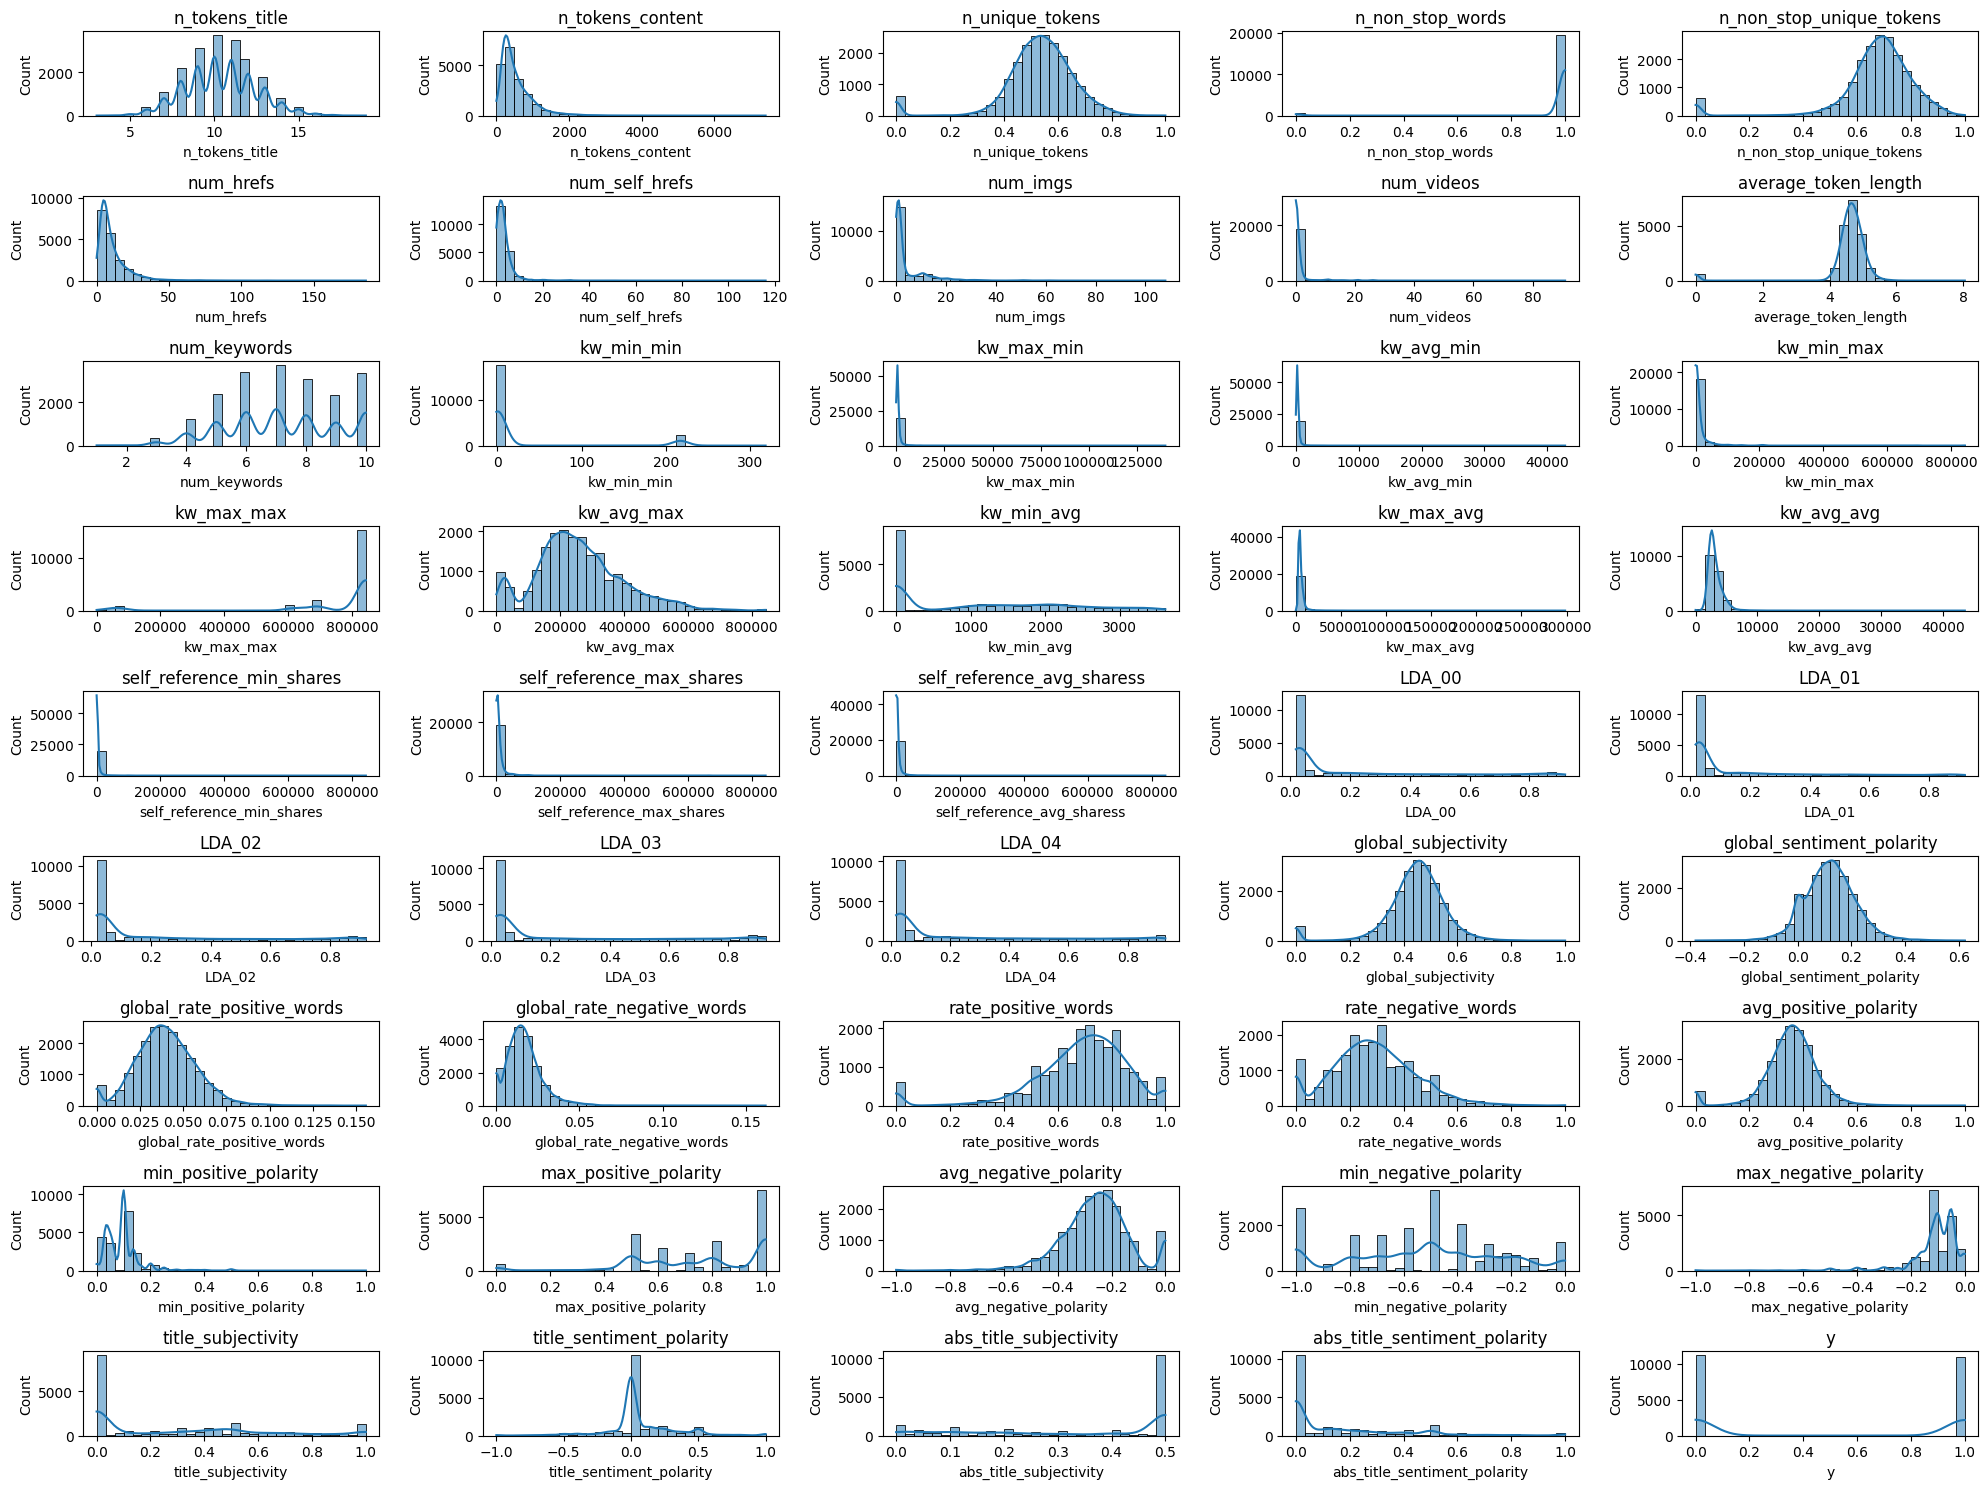

In [11]:
a = train_df.drop(columns=['id', 'shares'])
num_cols = a.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = a.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(9, 5, i+1)  
    sns.histplot(a[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

* Boxplot visualization for outlier detection

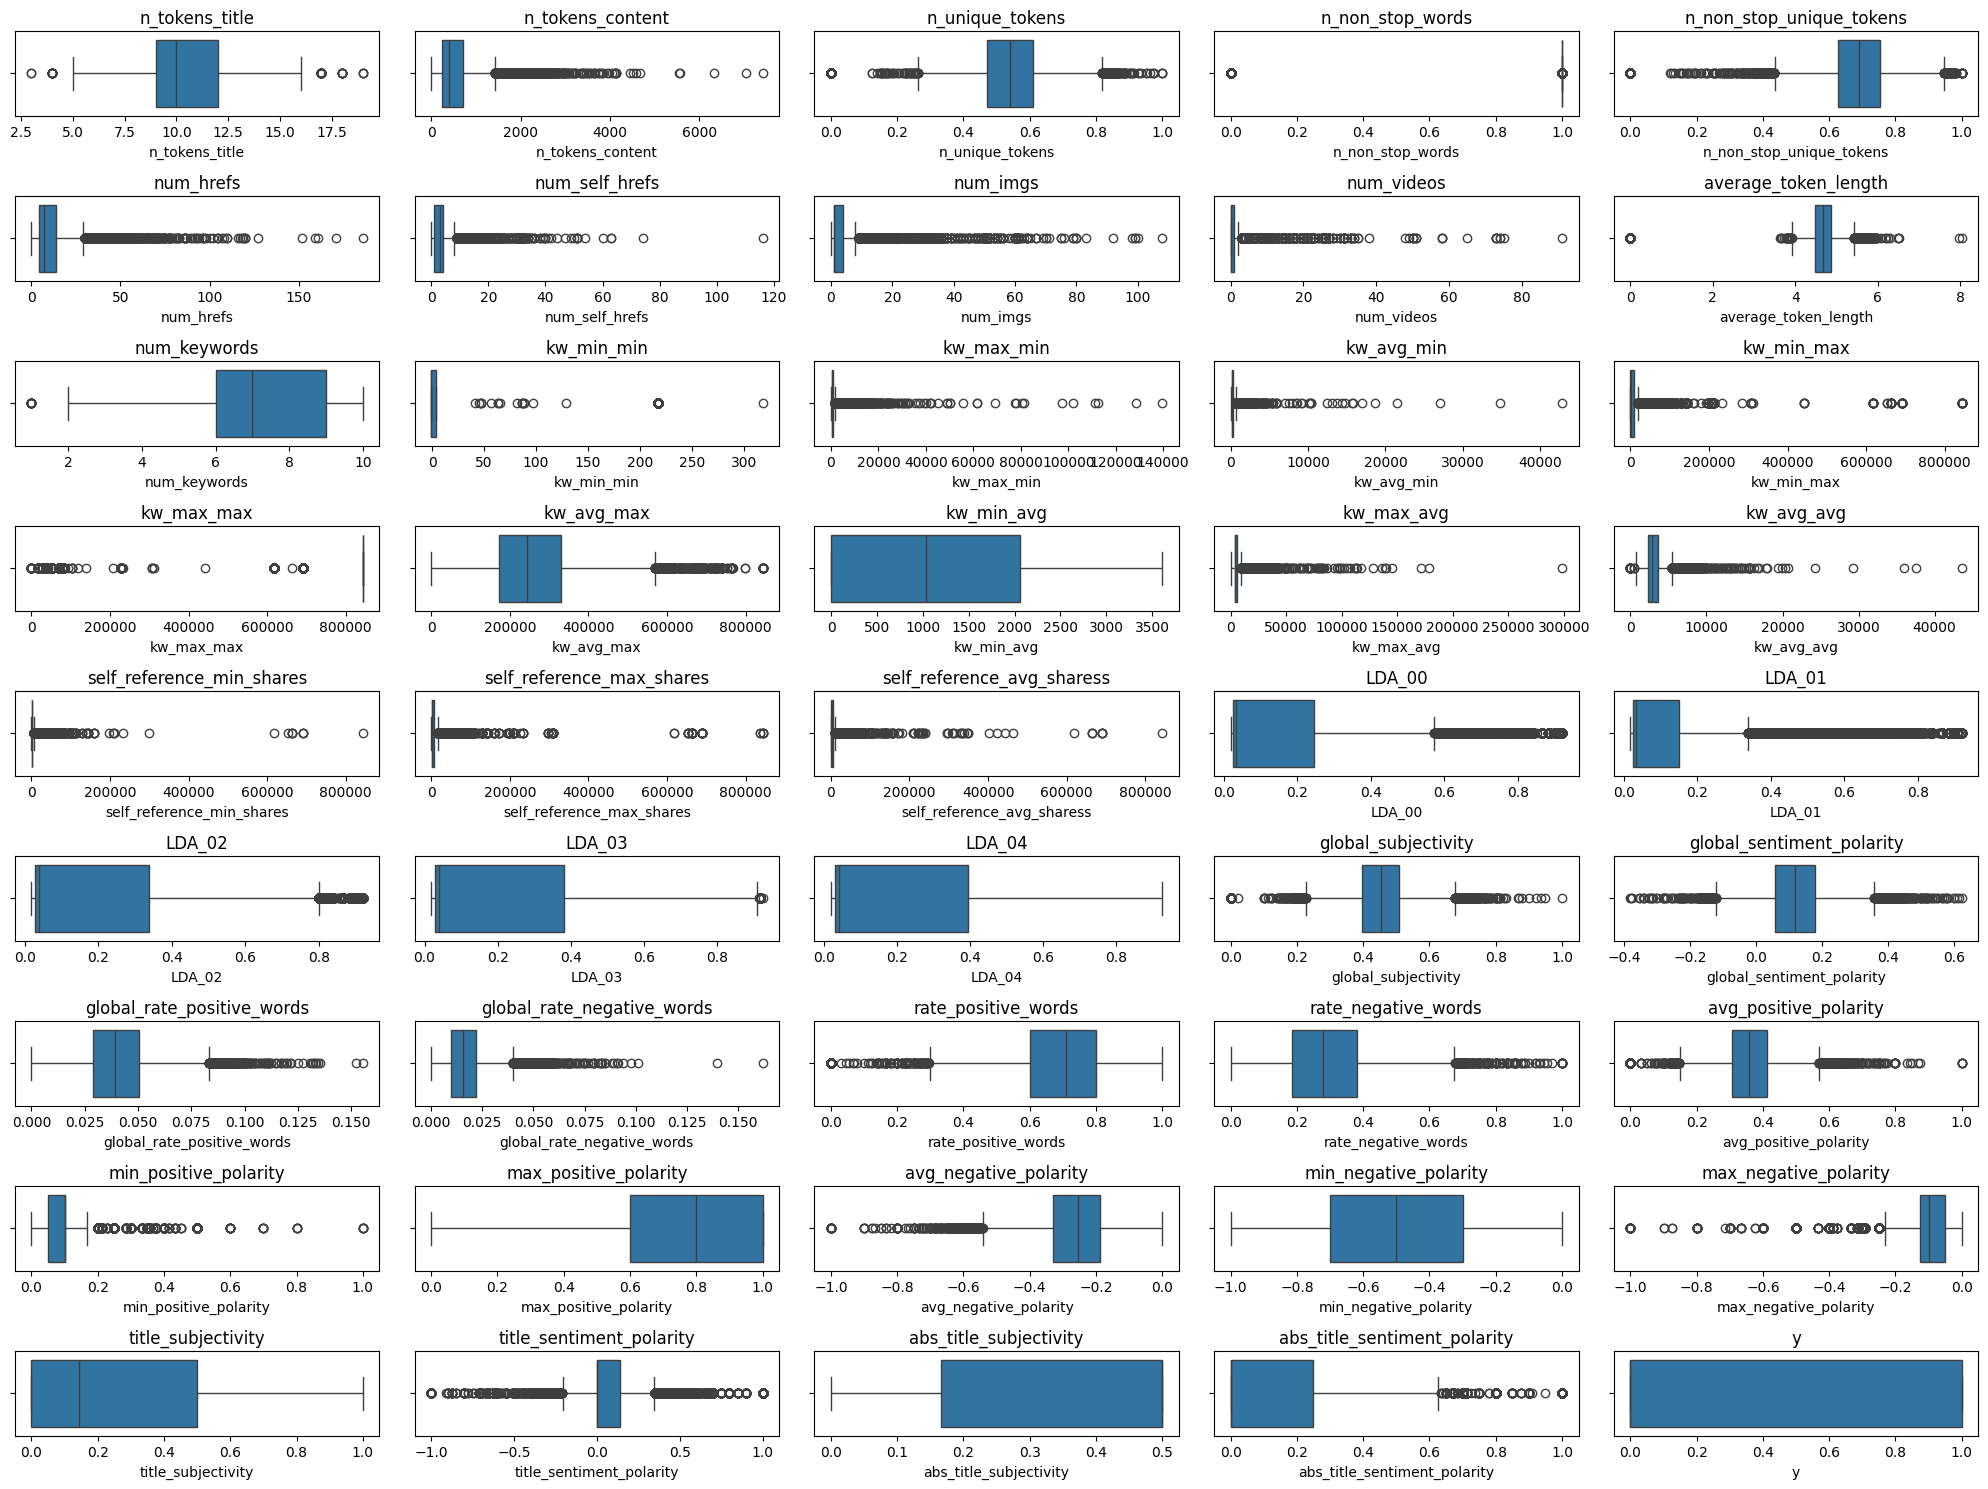

In [12]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(9, 5, i+1)
    sns.boxplot(x=a[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Multivariate Analysis

* Correlation

In [13]:
train_df.corr(numeric_only=True)

id  n_tokens_title  n_tokens_content  \
id                            1.000000        0.008988         -0.007422   
n_tokens_title                0.008988        1.000000          0.023541   
n_tokens_content             -0.007422        0.023541          1.000000   
n_unique_tokens              -0.003065       -0.047251         -0.398486   
n_non_stop_words             -0.008102       -0.037282          0.205090   
n_non_stop_unique_tokens     -0.007731       -0.039228         -0.221922   
num_hrefs                    -0.007487       -0.055228          0.430657   
num_self_hrefs               -0.012500       -0.006509          0.306661   
num_imgs                     -0.014170       -0.000594          0.337536   
num_videos                    0.007545        0.051128          0.105051   
average_token_length         -0.004348       -0.066724          0.166334   
num_keywords                  0.005063       -0.007274          0.073502   
kw_min_min                   -0.004472       -0.117282         -0.059380   
kw_max_min                    0.008192       -0.009506         -0.003087   
kw_avg_min                    0.018799       -0.034884         -0.008695   
kw_min_max                   -0.006083        0.018498         -0.024136   
kw_max_max                    0.011627        0.127041          0.056921   
kw_avg_max                   -0.002028        0.110706         -0.099629   
kw_min_avg                   -0.004788       -0.006282         -0.024701   
kw_max_avg                    0.007760       -0.001532         -0.036549   
kw_avg_avg                    0.006127        0.000794         -0.087544   
self_reference_min_shares     0.003319       -0.007956         -0.038381   
self_reference_max_shares    -0.000609        0.003586          0.022924   
self_reference_avg_sharess   -0.000837        0.003386         -0.025199   
LDA_00                       -0.001532       -0.073404          0.032739   
LDA_01                        0.000310        0.068918         -0.007504   
LDA_02                       -0.004084        0.039109          0.089047   
LDA_03                       -0.006766        0.036874         -0.145654   
LDA_04                        0.003376       -0.065150          0.035601   
global_subjectivity          -0.011703       -0.055577          0.129325   
global_sentiment_polarity     0.001642       -0.066111          0.022476   
global_rate_positive_words   -0.004938       -0.065119          0.134719   
global_rate_negative_words   -0.020856        0.020101          0.130797   
rate_positive_words           0.006090       -0.062162          0.095316   
rate_negative_words          -0.015983        0.037659          0.104465   
avg_positive_polarity        -0.011561       -0.047315          0.140104   
min_positive_polarity        -0.003867       -0.035202         -0.259869   
max_positive_polarity        -0.003767       -0.013543          0.419247   
avg_negative_polarity         0.017934       -0.018025         -0.131754   
min_negative_polarity         0.015100       -0.035693         -0.452310   
max_negative_polarity         0.005676        0.017126          0.225832   
title_subjectivity           -0.013930        0.068287          0.008217   
title_sentiment_polarity      0.001358       -0.001073          0.022963   
abs_title_subjectivity        0.000737       -0.145166          0.006482   
abs_title_sentiment_polarity -0.010266        0.039789          0.013519   
shares                       -0.003861        0.009078          0.009058   
y                            -0.009158       -0.041227          0.036519   

                              n_unique_tokens  n_non_stop_words  \
id                                  -0.003065         -0.008102   
n_tokens_title                      -0.047251         -0.037282   
n_tokens_content                    -0.398486          0.205090   
n_unique_tokens                      1.000000          0.683342   
n_non_stop_words                     0.683342       

<Axes: >

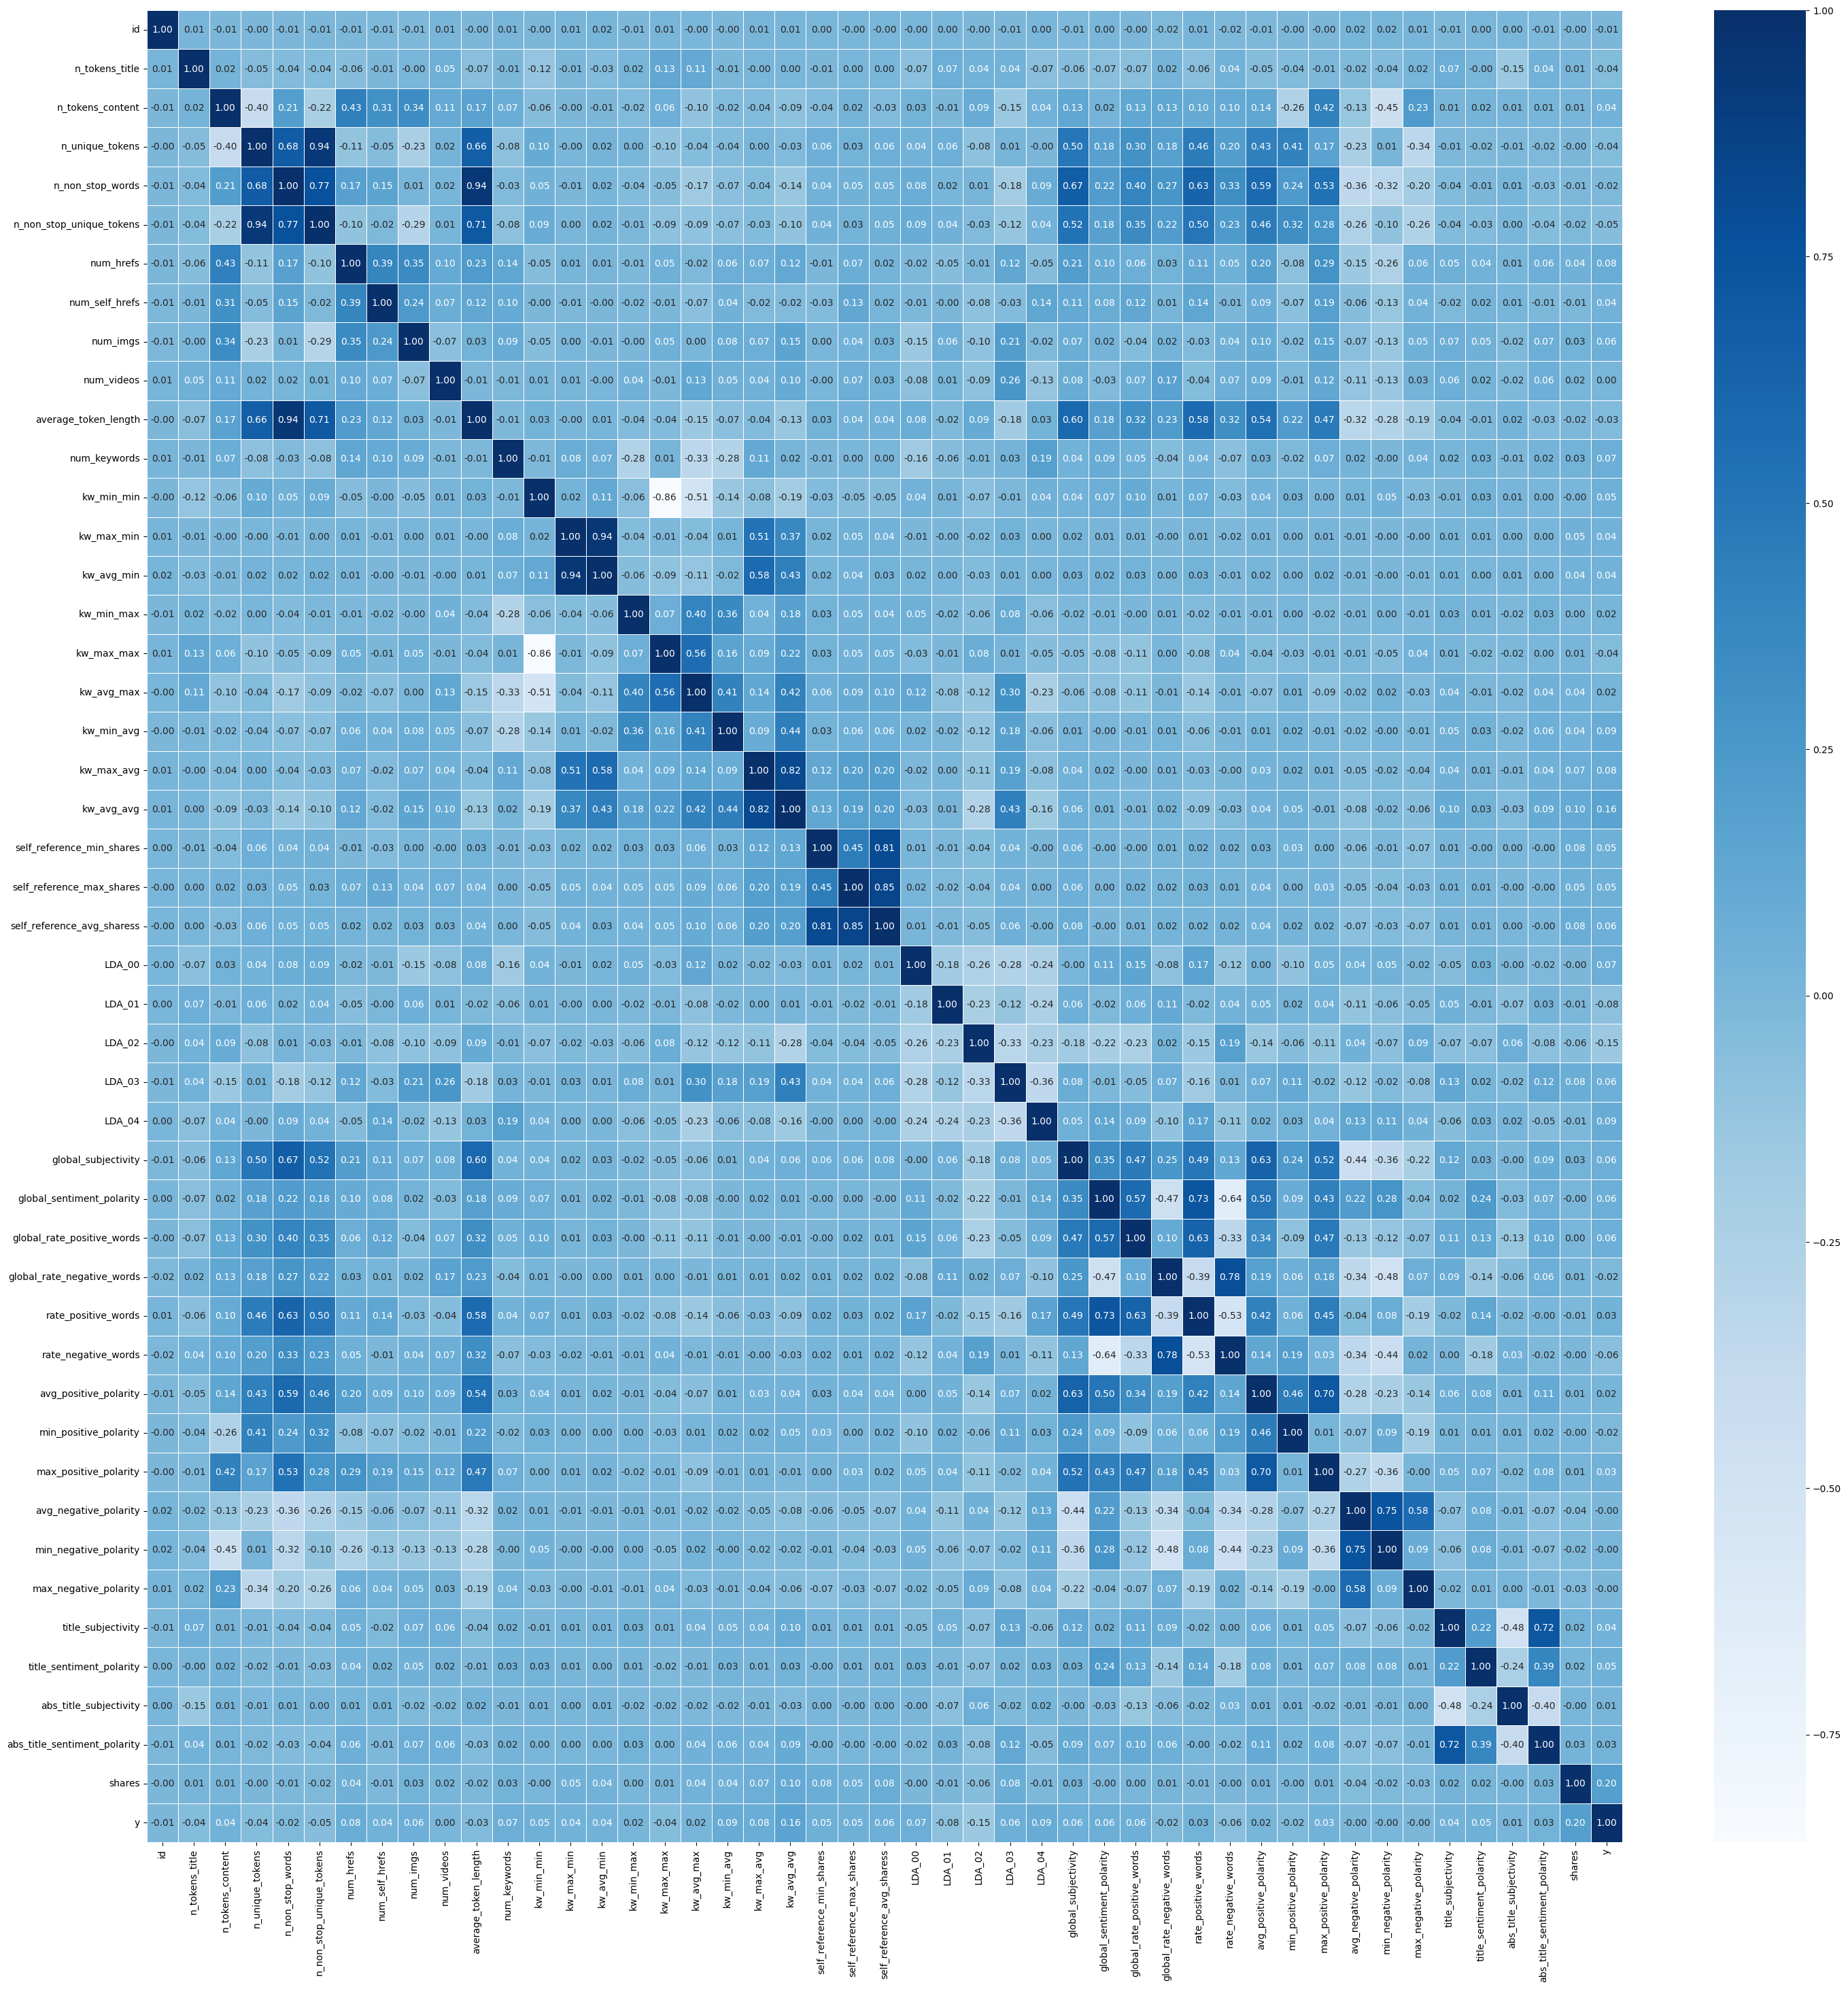

In [14]:
plt.figure(figsize=(35,35))
sns.heatmap(data = train_df.corr(numeric_only=True), annot=True, fmt = '.2f', linewidths=0.5, cmap='Blues')

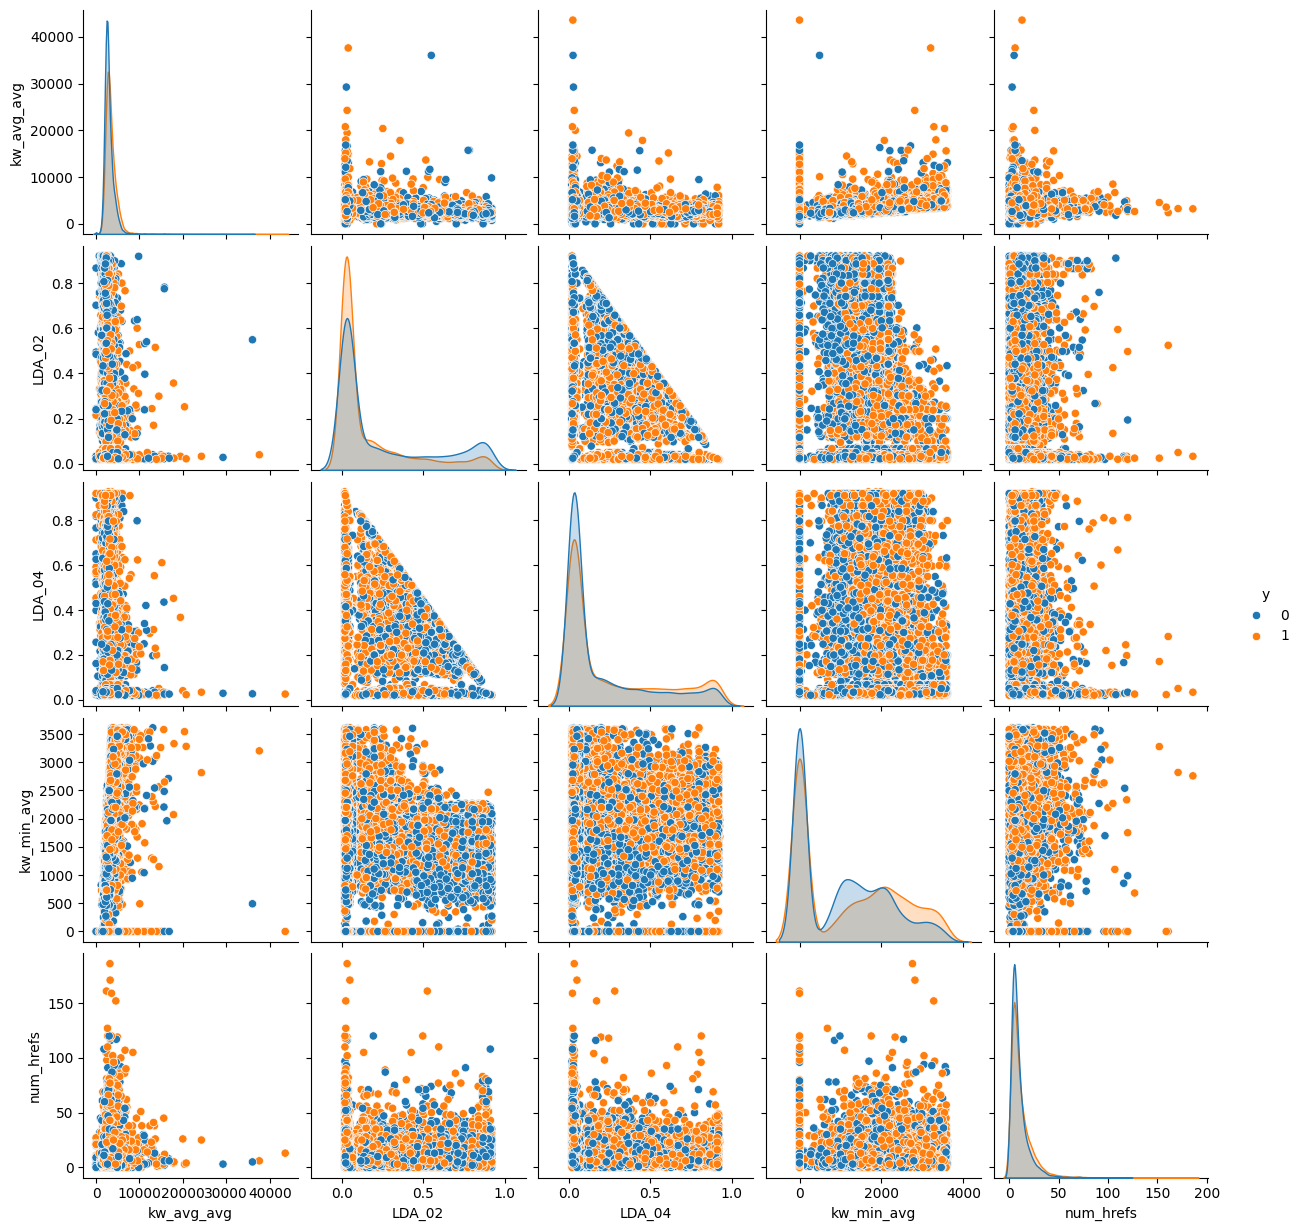

In [15]:
top_corr_features = train_df.corr(numeric_only=True)['y'].abs().sort_values(ascending=False).index[2:7] #1: shares 
sns.pairplot(train_df[top_corr_features.tolist() + ['y']], hue='y')
plt.show()

* Correlation w/ y

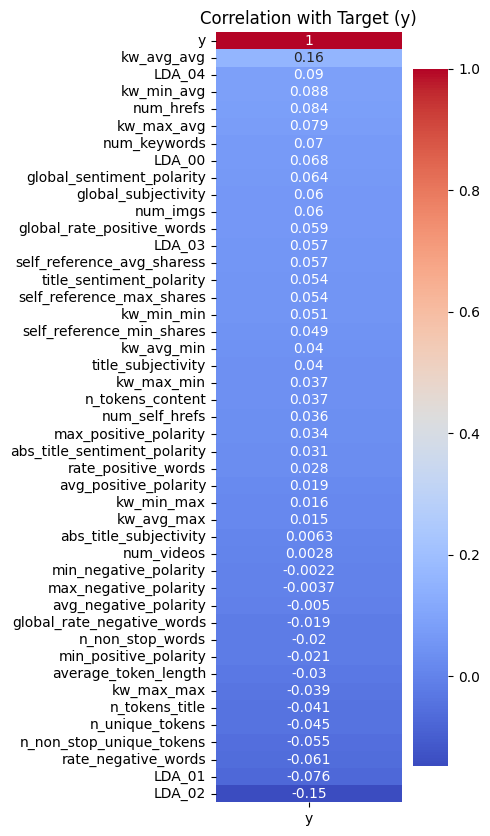

In [16]:
plt.figure(figsize=(3, 10))
sns.heatmap(a.corr(numeric_only=True)[['y']].sort_values(by='y', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Correlation with Target (y)")
plt.show()

* Feature distribution by target

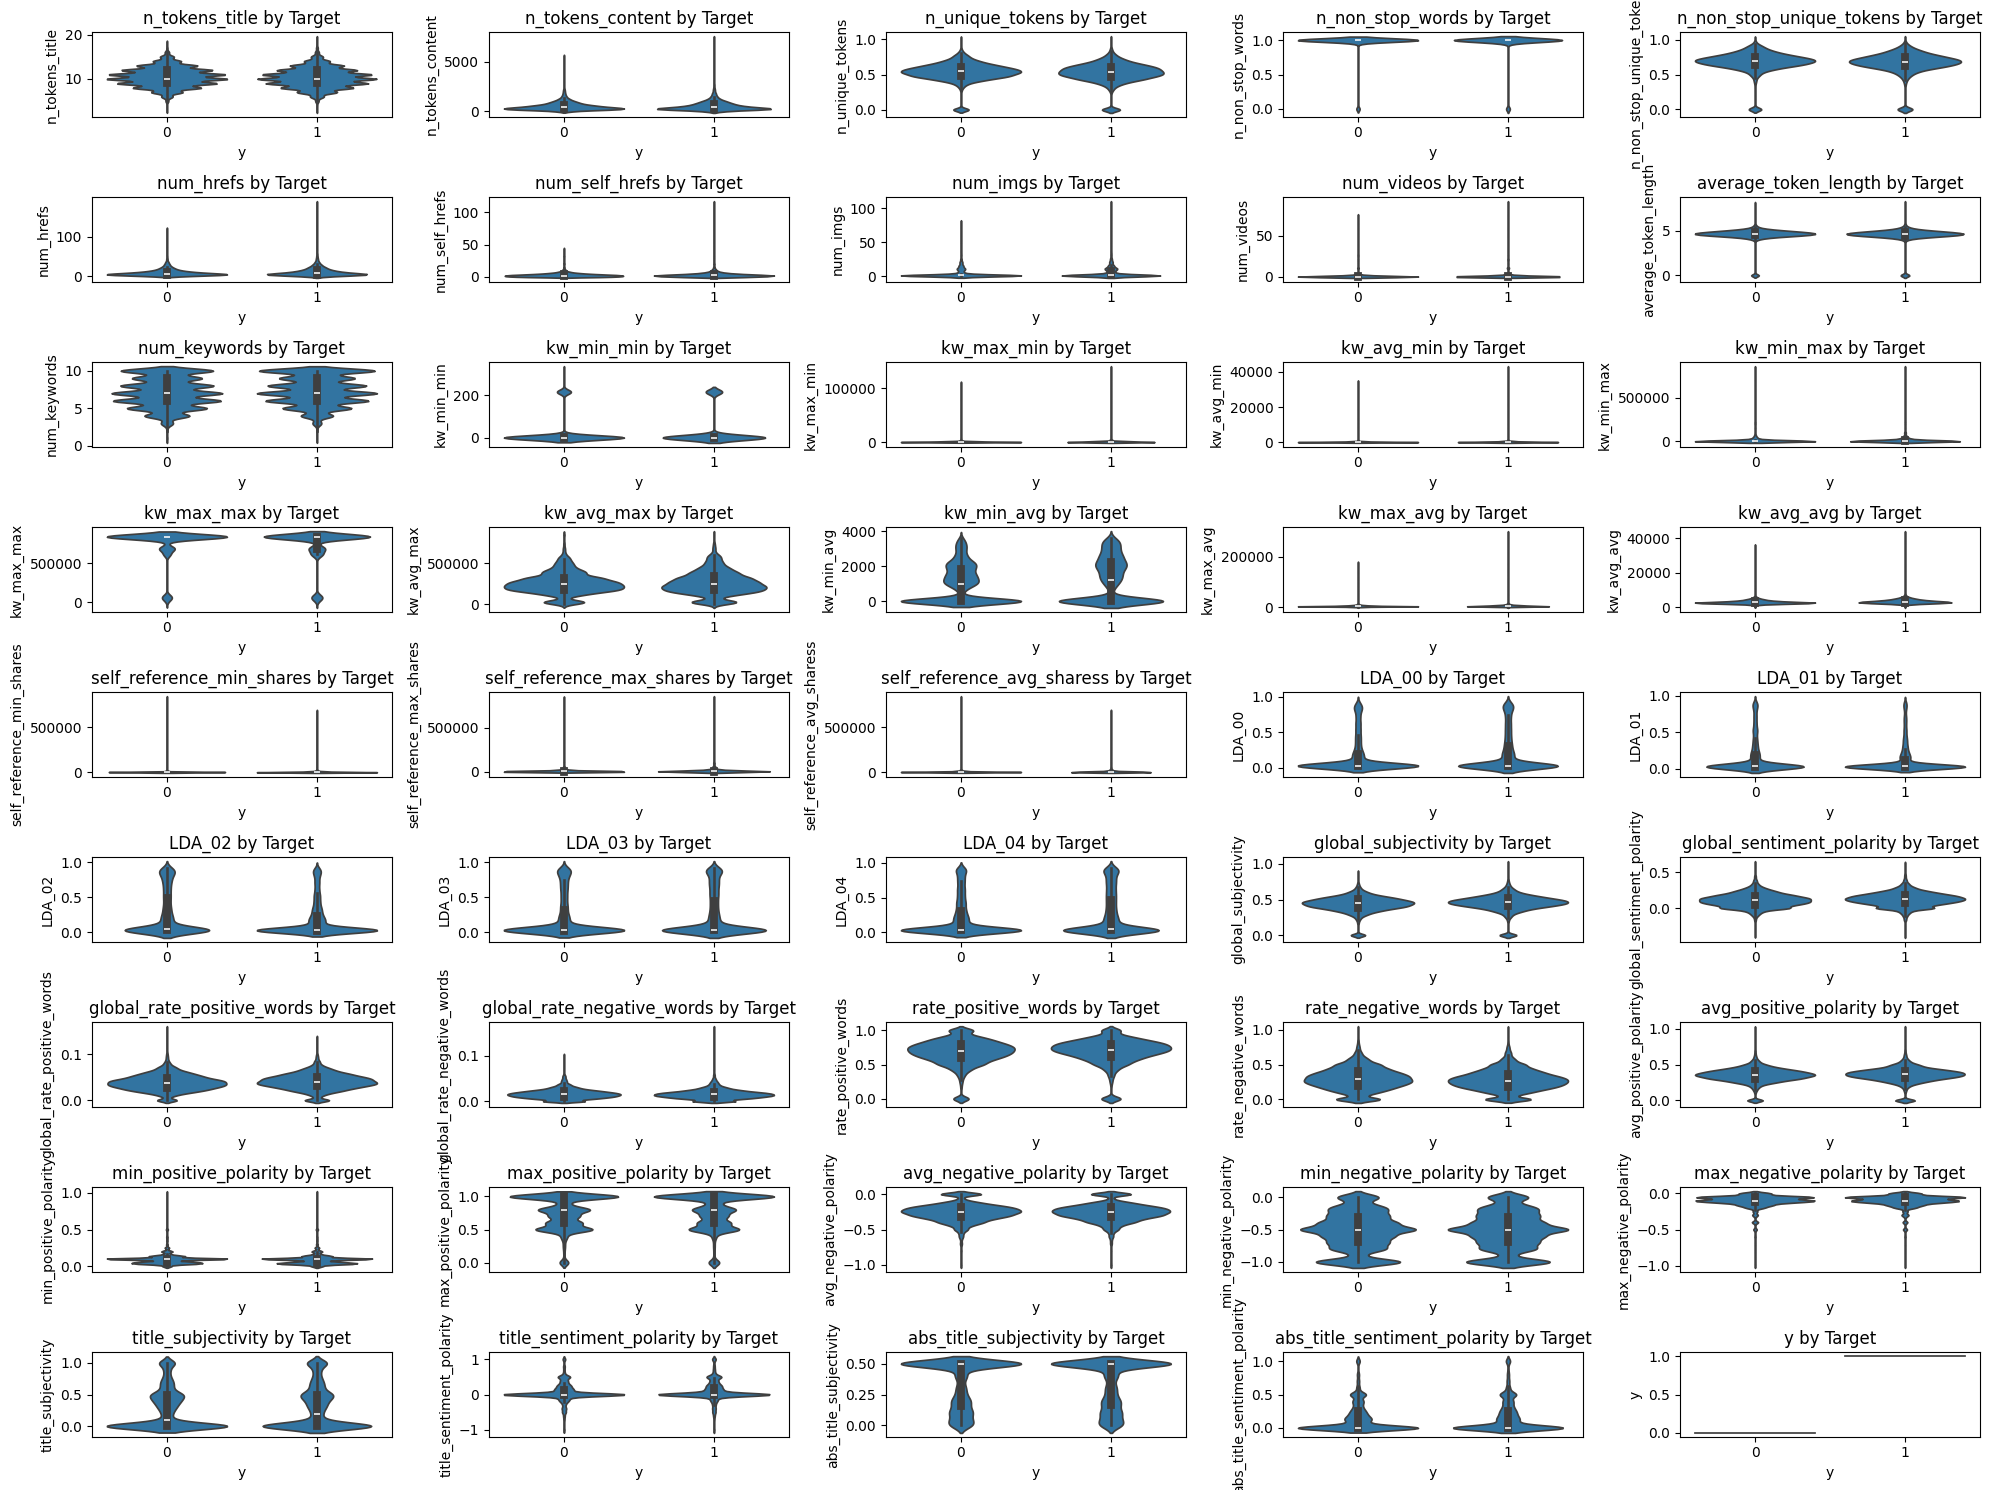

In [17]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):  
    plt.subplot(9, 5, i+1)
    sns.violinplot(x='y', y=col, data=a)
    plt.title(f"{col} by Target")
plt.tight_layout()
plt.show()

### Statistics for categrical data

In [18]:
train_df.describe(include=['O'])

data_channel    weekday
count         20053      20087
unique            6          7
top           World  Wednesday
freq           4245       3798

* Histogram

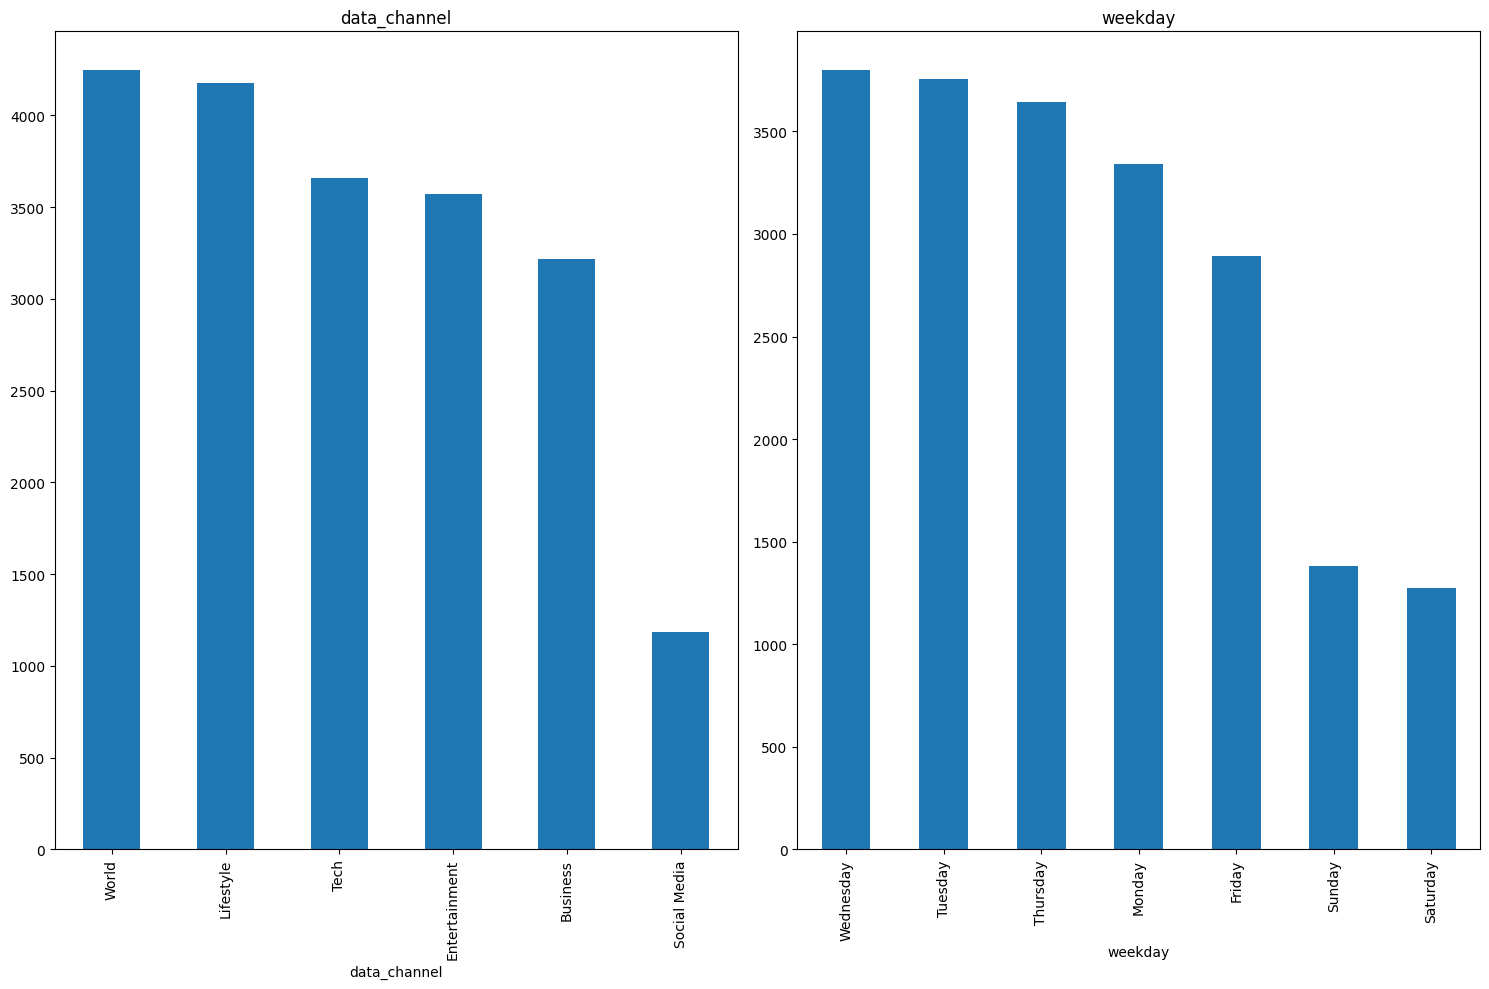

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 2, i+1) 
    train_df[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()

In [20]:
for col in cat_cols:
    print(train_df.groupby(col)['y'].mean().sort_values(ascending=False))

data_channel
Social Media     0.725738
Tech             0.596390
Lifestyle        0.593728
Business         0.483841
Entertainment    0.380566
World            0.355241
Name: y, dtype: float64
weekday
Saturday     0.711373
Sunday       0.636495
Friday       0.498963
Monday       0.479185
Thursday     0.469959
Tuesday      0.451132
Wednesday    0.451027
Name: y, dtype: float64


* Feature distribution by target

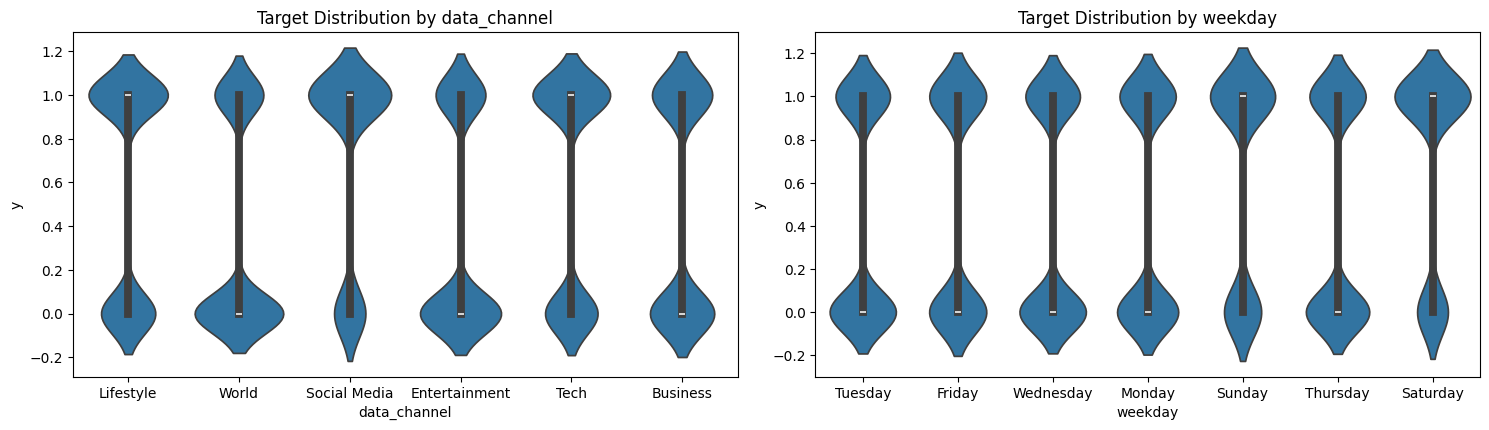

In [21]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x=col, y='y', data=a)
    plt.title(f"Target Distribution by {col}")
plt.tight_layout()
plt.show()

### Additional information

* Check features with large standard deviation (in case scaling is necessary)

In [22]:
std_values = a[num_cols].std().sort_values(ascending=False)
a[num_cols].std().sort_values(ascending=False)

kw_max_max                      215052.173575
kw_avg_max                      135661.345409
kw_min_max                       55609.259537
self_reference_max_shares        38562.947611
self_reference_avg_sharess       22153.925862
self_reference_min_shares        18332.249966
kw_max_avg                        6214.378620
kw_max_min                        3228.508496
kw_avg_avg                        1335.078834
kw_min_avg                        1139.019574
kw_avg_min                         679.365352
n_tokens_content                   460.694982
kw_min_min                          69.964141
num_hrefs                           11.024976
num_imgs                             8.092647
num_videos                           4.087507
num_self_hrefs                       3.944523
n_tokens_title                       2.105585
num_keywords                         1.910818
average_token_length                 0.840299
y                                    0.499993
title_subjectivity                

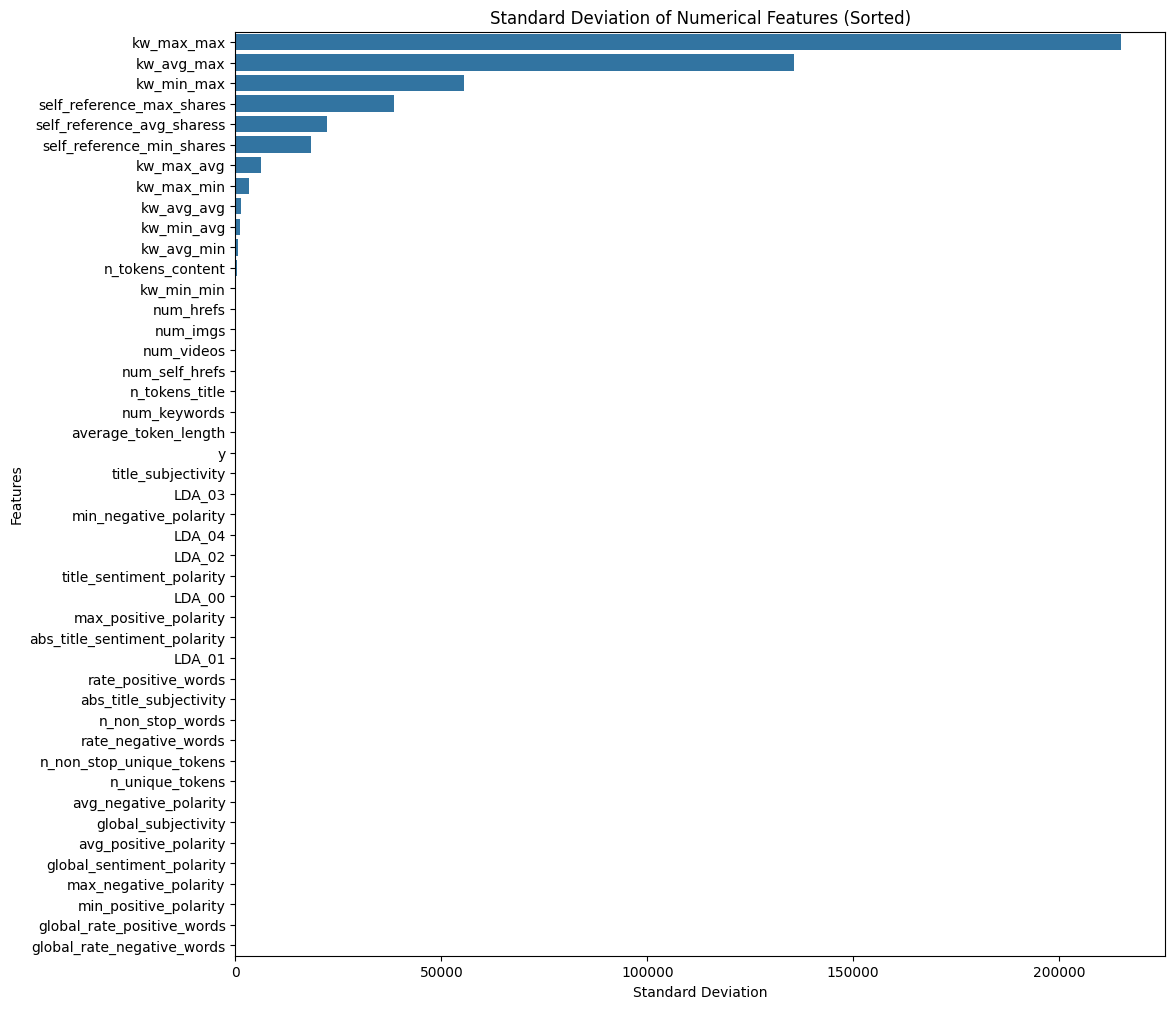

In [23]:
plt.figure(figsize=(12, 12))
sns.barplot(x=std_values.values, y=std_values.index)
plt.title("Standard Deviation of Numerical Features (Sorted)")
plt.xlabel("Standard Deviation")
plt.ylabel("Features")
plt.show()

* Skewness check (measures the degree of asymmetry of the data distribution and also checks whether scaling is necessary)

In [24]:
a[num_cols].skew().sort_values(ascending=False)

kw_avg_min                      30.288214
self_reference_min_shares       27.711550
kw_max_min                      21.022457
self_reference_avg_sharess      18.769065
kw_max_avg                      15.441799
self_reference_max_shares       14.498172
kw_min_max                      10.555615
num_videos                       7.190628
kw_avg_avg                       6.016832
num_self_hrefs                   5.684025
num_imgs                         3.709896
num_hrefs                        3.534654
min_positive_polarity            3.135784
n_tokens_content                 2.637718
kw_min_min                       2.353676
LDA_01                           2.110655
abs_title_sentiment_polarity     1.693220
LDA_00                           1.556299
global_rate_negative_words       1.410216
LDA_02                           1.298259
LDA_03                           1.225216
LDA_04                           1.196641
title_subjectivity               0.810309
kw_avg_max                       0

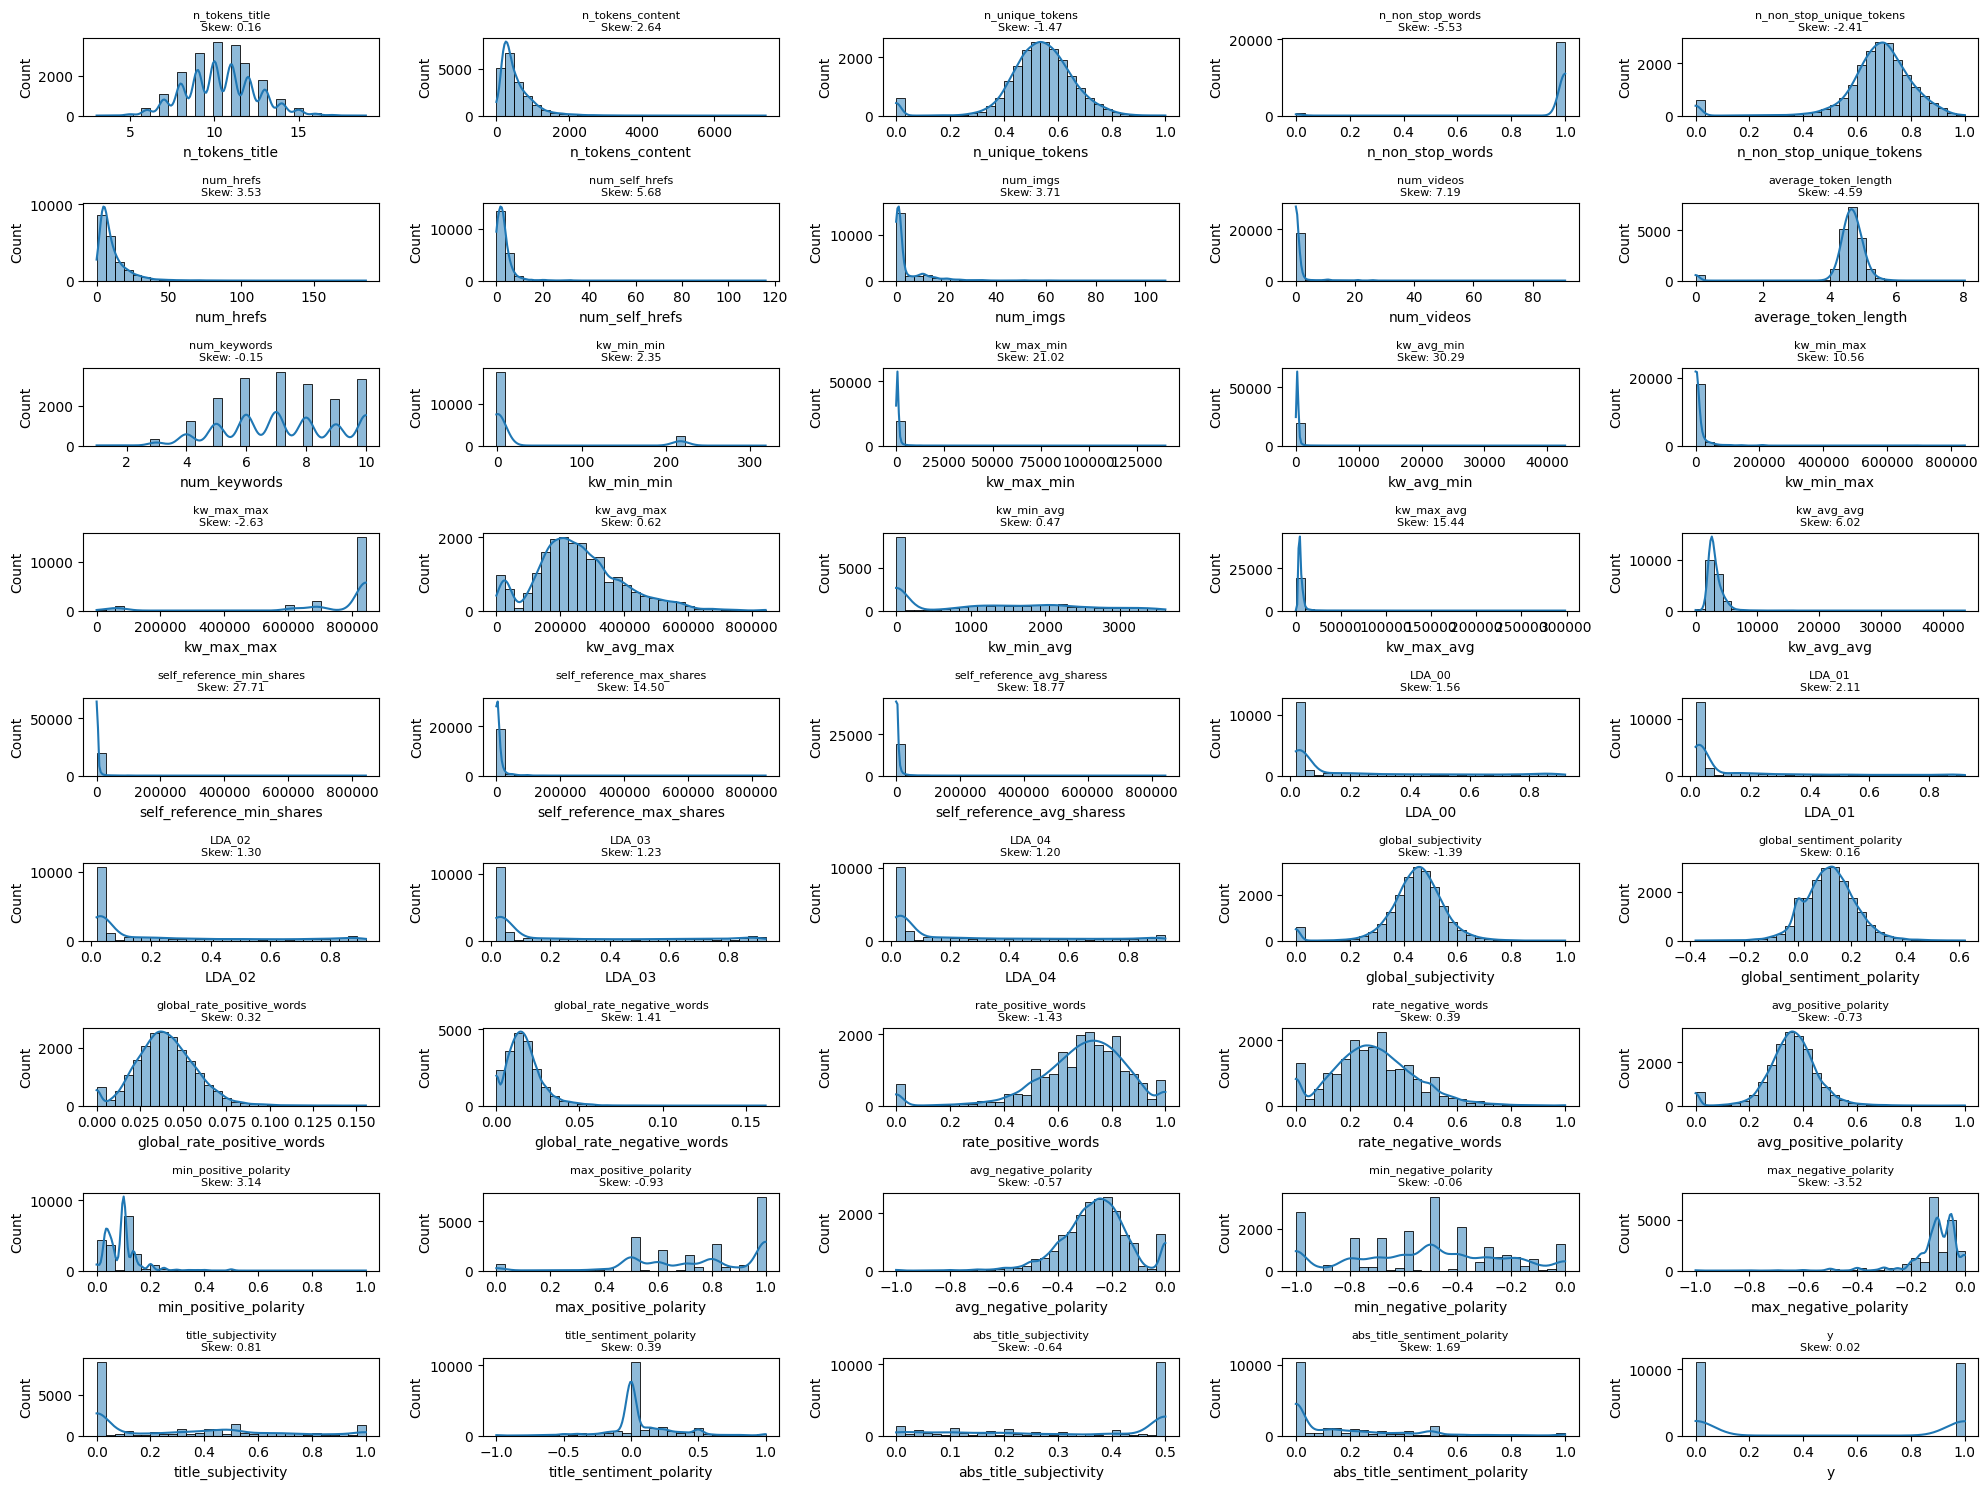

In [25]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(9, 5, i+1)  
    sns.histplot(a[col], kde=True, bins=30)
    skewness = a[col].skew()
    plt.title(f"{col}\nSkew: {skewness:.2f}", fontsize=8)
plt.tight_layout()
plt.show()

## (Additional) Quickhacks w/ EDA Library

In [27]:
from ydata_profiling import ProfileReport 

profile = ProfileReport(
    a, 
    title="EDA Report", 
    minimal=True,  
    explorative=False
)

profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 47/47 [00:00<00:00, 271.07it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data preprocessing
* Normalization, encoding, and handling missing or outlier values, ….

In [9]:
df = train_df

### Handling missing values

In [10]:
#전체 numerical 변수 중앙값으로 일괄 처리 후 일부는 평균값 처리
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['id', 'y'])
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

mean_cols = [
    'global_sentiment_polarity', 'global_rate_positive_words',
    'rate_negative_words', 'avg_negative_polarity', 'min_negative_polarity',
    'title_sentiment_polarity', 'title_subjectivity'
]
for col in mean_cols:
    df[col] = df[col].mask(df[col].isna(), df[col].mean())


#categorical 변수 unknown으로 처리
df['data_channel']=df['data_channel'].fillna('unknown')
df['weekday']=df['weekday'].fillna('unknown')

### categorical 변수 One-hot encoding

In [11]:
df = pd.get_dummies(df, columns=['data_channel', 'weekday'], drop_first=True)

### Handling outliers

In [12]:
import numpy as np

#1. IQR 기반 clip
clip_cols = [
    'n_tokens_content', 'num_hrefs', 'num_self_hrefs',
    'kw_avg_avg']
for col in clip_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

#2. 상한 제한
    df['num_videos'] = df['num_videos'].clip(upper=6)
    df['num_imgs'] = df['num_imgs'].clip(upper=20)

#3. 값 중 51.8%가 -1 => 반 이상 결측값(dummy처리) => 제거
df = df.drop(columns=['kw_min_min'])

#4
df['average_token_length'] = df['average_token_length'].replace(0, np.nan)
df['average_token_length'] = df['average_token_length'].fillna(df['average_token_length'].median())

#5. 음수-> NaN-> 중앙값
df['kw_avg_min'] = df['kw_avg_min'].replace(-1, np.nan)
df['kw_avg_min'] = df['kw_avg_min'].fillna(df['kw_avg_min'].median())
df['kw_avg_min'] = np.log1p(df['kw_avg_min'].clip(lower=0))

#6. kw_min_max, Zeros = 8611 (38.8%) => 결측치의 대체값으로 판단
# 0을 결측치로 보고 중앙값으로 채움
df['kw_min_max'] = df['kw_min_max'].replace(0, np.nan)
df['kw_min_max'] = df['kw_min_max'].fillna(df['kw_min_max'].median())

#7. kw_min_avg, 음수값, Zeros	8664(39.0%) =>음수 처리 및 결측치 대체값으로 판단
df['kw_min_avg'] = df['kw_min_avg'].replace(-1, np.nan)
df['kw_min_avg'] = df['kw_min_avg'].replace(0, np.nan)
df['kw_min_avg'] = df['kw_min_avg'].fillna(df['kw_min_avg'].median())

#8. n_tokens_content==0 594(2.7%)
df = df[df['n_tokens_content'] != 0]

#9.
log_transform_cols = ['num_hrefs', 'kw_max_min', 'kw_min_max', 'kw_max_avg','self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']

for col in log_transform_cols:
  df[col] = np.log1p(df[col])

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# numerical inputs
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['id', 'y', 'shares'])

# scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

X = df.drop(columns=['id', 'shares', 'y'])
y = df['y']

# Data split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
X_train.to_csv('../datasets/X_train.csv')
X_val.to_csv('../datasets/X_val.csv')
y_train.to_csv('../datasets/y_train.csv')
y_val.to_csv('../datasets/y_val.csv')